1. Installing required libraries

In [24]:
!pip install pandas numpy matplotlib seaborn scikit-learn mlxtend plotly -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# For clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# For association rules
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# For visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("All libraries imported successfully!")

All libraries imported successfully!


2. Data Loading and Exploration

In [25]:
# Loading the dataset
print("Loading Amazon sales data...")
df = pd.read_csv('amazon.csv')
print(f"Data loaded successfully! Shape: {df.shape}")

# Display basic information
print("\nDataset Overview:")
print(df.info())

Loading Amazon sales data...
Data loaded successfully! Shape: (1465, 16)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link    

In [26]:
# Display first 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [27]:
# Understand the columns
print("\nKey Columns in Amazon Dataset:")
print("- product_id: Unique product identifier")
print("- product_name: Name of the product")
print("- discounted_price: Selling price after discount")
print("- actual_price: Original price before discount")
print("- rating: Customer rating (1-5)")
print("- user_id: Unique customer identifier")
print("- review_content: Customer review text")

# Convert 'rating' column to numeric, coercing errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Basic statistics
print("\nBasic Statistics:")
print(f"Total products: {df['product_id'].nunique()}")
print(f"Unique customers: {df['user_id'].nunique()}")
print(f"Average rating: {df['rating'].mean():.2f}")
print(f"Date range needs to be extracted from review dates if available")


Key Columns in Amazon Dataset:
- product_id: Unique product identifier
- product_name: Name of the product
- discounted_price: Selling price after discount
- actual_price: Original price before discount
- rating: Customer rating (1-5)
- user_id: Unique customer identifier
- review_content: Customer review text

Basic Statistics:
Total products: 1351
Unique customers: 1194
Average rating: 4.10
Date range needs to be extracted from review dates if available


3. Data Preprocessing and Feature Engineering

In [28]:
# Data cleaning
print(f"\nOriginal data shape: {df.shape}")

# Drop irrelevant columns
cols_to_drop = ['about_product', 'review_title', 'review_content', 'img_link',
                'product_link', 'user_name', 'review_id']
df = df.drop(columns=cols_to_drop, errors='ignore')
print(f"After dropping text/URL columns: {df.shape}")


Original data shape: (1465, 16)
After dropping text/URL columns: (1465, 9)


In [29]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
user_id                0
dtype: int64


In [30]:
# Drop rows with missing values
print(f"\nShape before dropping missing values: {df.shape}")
df.dropna(inplace=True)
print(f"Shape after dropping missing values: {df.shape}")



Shape before dropping missing values: (1465, 9)
Shape after dropping missing values: (1462, 9)


In [31]:
# Shape after dropping missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
user_id                0
dtype: int64


In [32]:
# Convert price columns to numeric (remove ₹ symbol and commas)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)

# Create a transaction date column
try:
    df['transaction_date'] = pd.to_datetime(df['review_date'])
    df = df.drop(columns=['review_date'], errors='ignore')
except:
    print("No review_date column found, creating synthetic dates for analysis")
    df['transaction_date'] = pd.date_range(end=pd.Timestamp.today(), periods=len(df), freq='D')

# Calculate monetary value per transaction
df['monetary_value'] = df['discounted_price']

# Print final cleaned data shape
print(f"\nFinal cleaned data shape: {df.shape}")
print("Columns retained:", df.columns.tolist())


No review_date column found, creating synthetic dates for analysis

Final cleaned data shape: (1462, 11)
Columns retained: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'user_id', 'transaction_date', 'monetary_value']


4. RFM Analysis

In [33]:
# Calculate RFM metrics
print("\nCalculating RFM metrics...")
reference_date = df['transaction_date'].max() + timedelta(days=1)
print(f"Reference date for recency calculation: {reference_date}")

rfm = df.groupby('user_id').agg({
    'transaction_date': lambda x: (reference_date - x.max()).days,  # Recency
    'product_id': 'count',  # Frequency
    'monetary_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']
print("\nRFM Table Sample:")
display(rfm.head())


Calculating RFM metrics...
Reference date for recency calculation: 2025-08-08 08:35:33.971767

RFM Table Sample:


,user_id,recency,frequency,monetary
0,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZA...",1260,1,239.0
1,"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS...",417,1,1999.0
2,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,1307,1,399.0
3,"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25...",1015,4,5246.0
4,"AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O...",1306,2,3098.0


4.a Visualize RFM Distributions

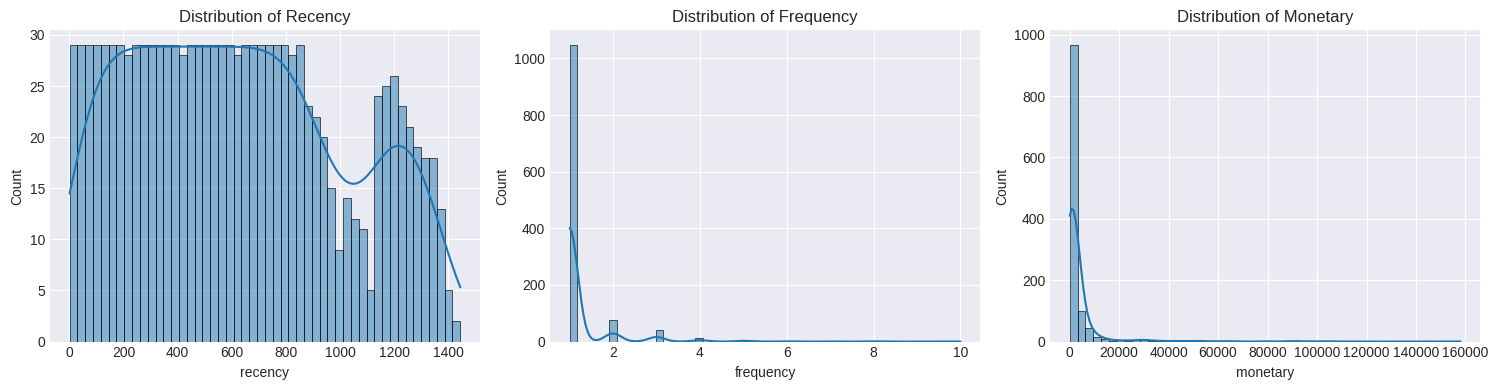

In [34]:
# Add additional features
rfm['avg_order_value'] = rfm['monetary'] / rfm['frequency']

# Visualize RFM distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(['recency', 'frequency', 'monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], bins=50, kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
plt.tight_layout()
plt.show()

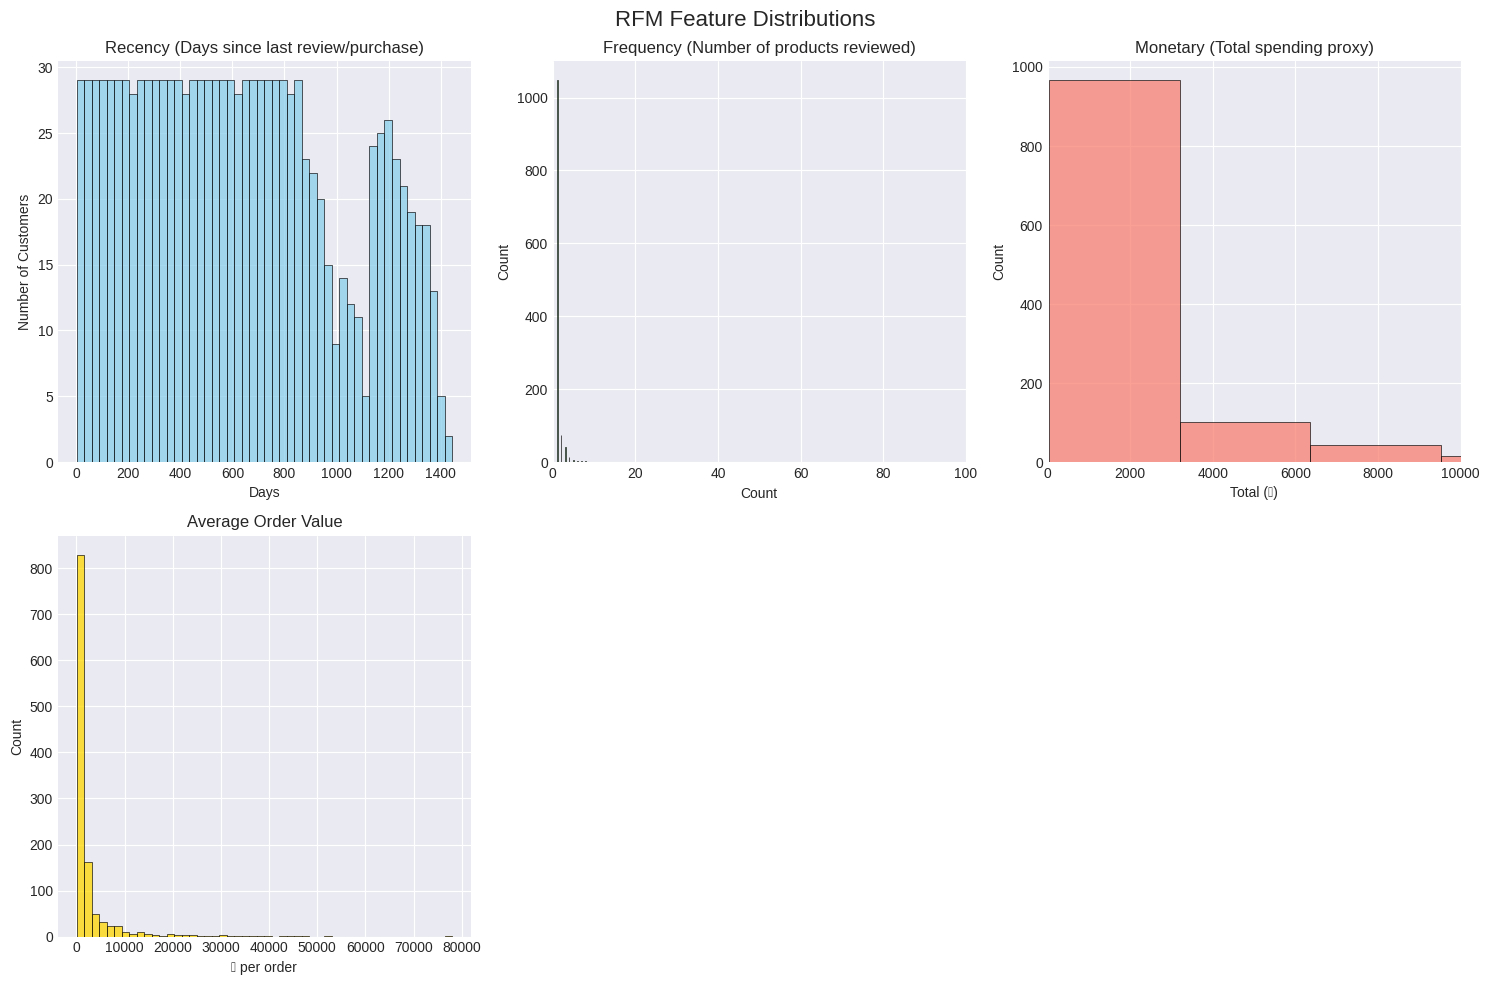

In [35]:
# More RFM Visualizations
plt.figure(figsize=(15, 10))
plt.suptitle('RFM Feature Distributions', fontsize=16)

# Recency
plt.subplot(2, 3, 1)
sns.histplot(rfm['recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency (Days since last review/purchase)')
plt.xlabel('Days')
plt.ylabel('Number of Customers')

# Frequency
plt.subplot(2, 3, 2)
sns.histplot(rfm['frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency (Number of products reviewed)')
plt.xlabel('Count')
plt.xlim(0, 100)

# Monetary
plt.subplot(2, 3, 3)
sns.histplot(rfm['monetary'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary (Total spending proxy)')
plt.xlabel('Total (₹)')  # Rupee symbol
plt.xlim(0, 10000)

# Avg Order Value
plt.subplot(2, 3, 4)
sns.histplot(rfm['avg_order_value'], bins=50, color='gold', edgecolor='black')
plt.title('Average Order Value')
plt.xlabel('₹ per order')

# Unique Products
if 'UniqueProducts' in rfm.columns:
    plt.subplot(2, 3, 5)
    sns.histplot(rfm['UniqueProducts'], bins=50, color='plum', edgecolor='black')
    plt.title('Unique Products Reviewed')
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

5. Customer Segmentation with K-Means Clustering

5.a. Feature Scaling

In [36]:
# Select features for clustering
features = ['recency', 'frequency', 'monetary', 'avg_order_value']
X = rfm[features]

# Handle outliers using IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_clean = X[mask]
rfm_clean = rfm[mask].copy()  # Create filtered copy of dataframe

print(f"Original data: {len(X)} customers")
print(f"After outlier removal: {len(X_clean)} customers")

# Standardize features to have mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

Original data: 1191 customers
After outlier removal: 919 customers


5.b. Finding Optimal Number of Clusters

Calculating optimal number of clusters...
K=2: WCSS = 1384.83, Silhouette = 0.483
K=3: WCSS = 841.41, Silhouette = 0.414
K=4: WCSS = 597.42, Silhouette = 0.410
K=5: WCSS = 465.30, Silhouette = 0.412
K=6: WCSS = 383.61, Silhouette = 0.419
K=7: WCSS = 320.68, Silhouette = 0.415


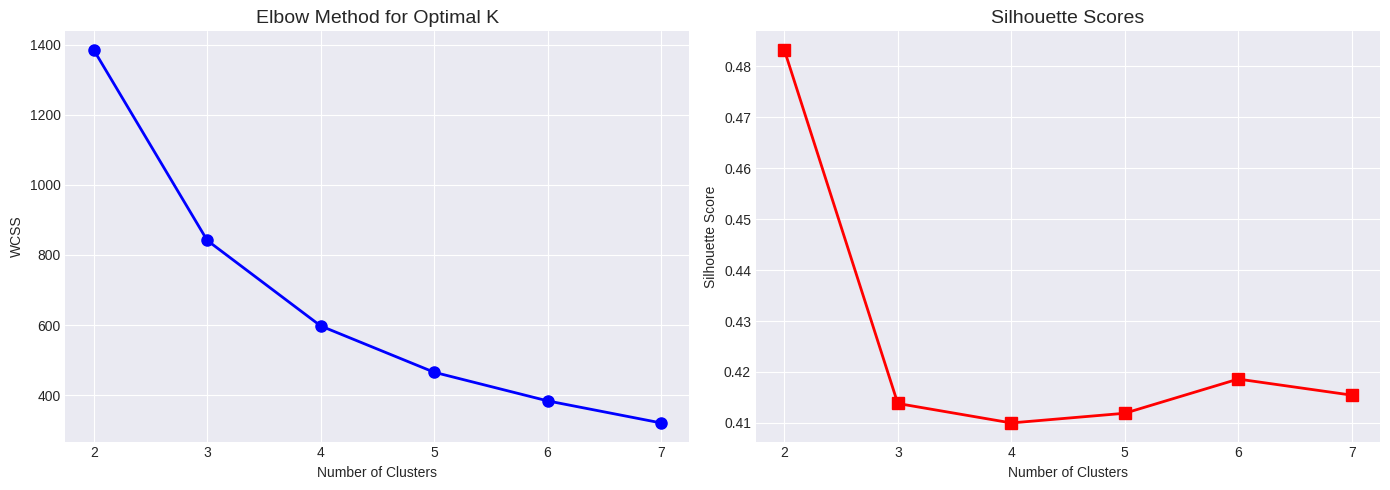


Optimal number of clusters: 2


In [37]:
# Initialize lists to store evaluation metrics
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 8)  # Test cluster numbers from 2 to 7

print("Calculating optimal number of clusters...")
for k in K:
    # Initialize KMeans with optimized parameters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)

    # Store evaluation metrics
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_,
                                           sample_size=min(1000, len(X_scaled))))

    print(f"K={k}: WCSS = {kmeans.inertia_:.2f}, Silhouette = {silhouette_scores[-1]:.3f}")

# Visualize elbow method and silhouette scores
plt.figure(figsize=(14, 5))

# Elbow method plot
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-', markersize=8, linewidth=2)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(K)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rs-', markersize=8, linewidth=2)
plt.title('Silhouette Scores', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K)

plt.tight_layout()
plt.show()

# Determine optimal number of clusters
optimal_k = K[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

5.c. Apply K-Means Clustering

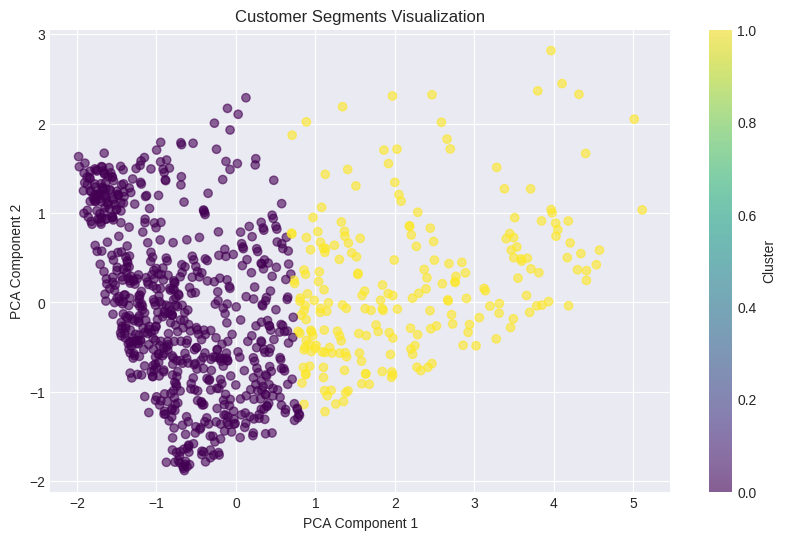


Cluster Profiles:


,recency,frequency,monetary,avg_order_value
Cluster,,,,
0,661.76,1.0,583.87,583.87
1,372.88,1.0,2331.27,2331.27


In [38]:
# Initialize final KMeans model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit model and assign clusters
rfm_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rfm_clean['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualization')
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_summary = rfm_clean.groupby('Cluster')[features].mean().round(2)
print("\nCluster Profiles:")
display(cluster_summary)

5.d. Radar Chart Visualization


Visualizing Cluster Profiles with Radar Chart...


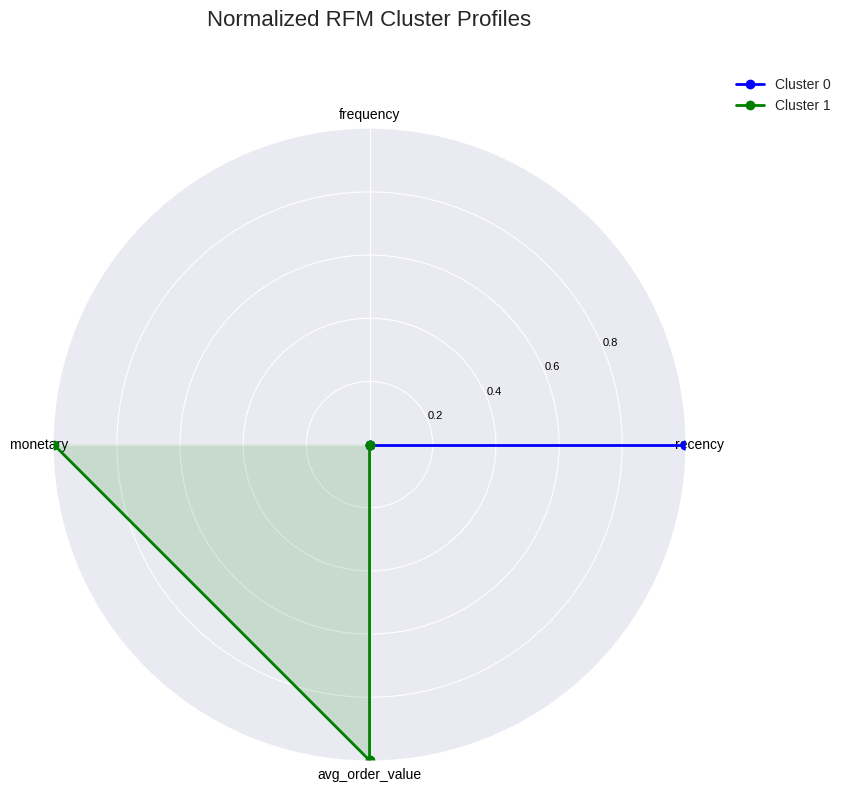

In [39]:
print("\nVisualizing Cluster Profiles with Radar Chart...")

# Normalize cluster profiles for radar chart (0-1 scale)
cluster_profiles_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# Set up radar chart parameters
categories = features
fig = plt.figure(figsize=(12, 8))
num_vars = len(categories)

# Calculate angles for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Initialize polar plot
ax = fig.add_subplot(111, polar=True)

# Configure axis labels
plt.xticks(angles[:-1], categories, color='black', size=10)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="black", size=8)
plt.ylim(0, 1)

# Define standard colors for clusters
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Plot each cluster's profile
for idx, row in cluster_profiles_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {idx}', color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.title('Normalized RFM Cluster Profiles', size=16, y=1.15)
plt.tight_layout()
plt.show()

6. Hierarchical Clustering (Alternative Approach)


6. Hierarchical Clustering Analysis


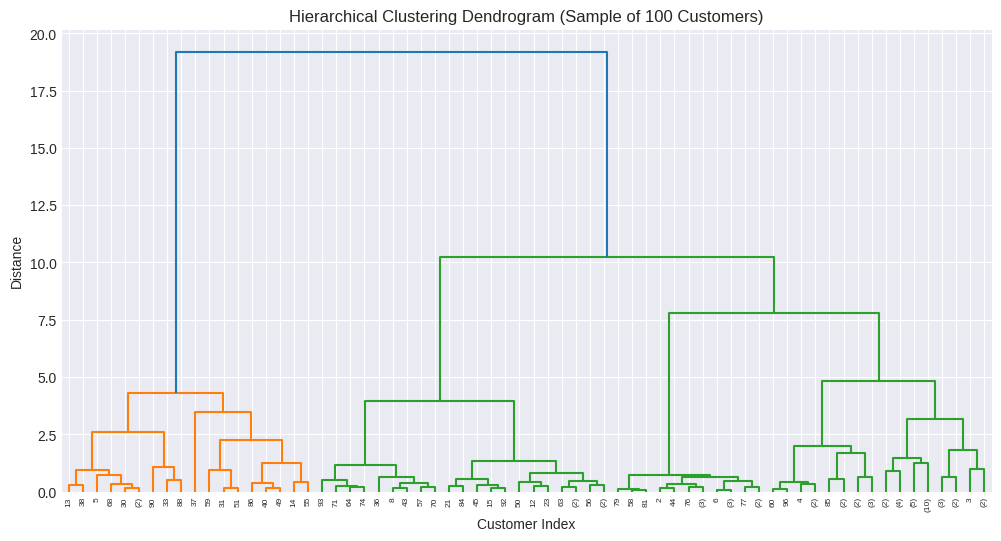


Applying Agglomerative Clustering to full dataset...

Similarity between K-Means and Hierarchical Clustering: 0.614
(1.0 = identical, 0.0 = random)


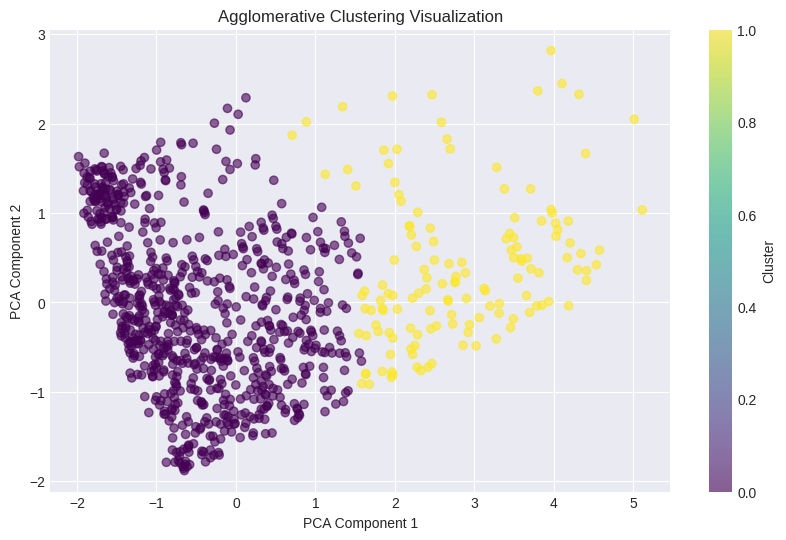


Cluster Profile Comparison:
K-Means Clusters:


,recency,frequency,monetary,avg_order_value
Cluster,,,,
0,661.76,1.0,583.87,583.87
1,372.88,1.0,2331.27,2331.27



Agglomerative Clusters:


,recency,frequency,monetary,avg_order_value
agg_cluster,,,,
0,632.54,1.0,697.74,697.74
1,360.35,1.0,2763.14,2763.14


In [40]:
print("\n6. Hierarchical Clustering Analysis")

# Import required functions for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Create linkage matrix using a sample for visualization
sample_indices = np.random.choice(len(X_scaled), size=min(100, len(X_scaled)), replace=False)
X_sample = X_scaled[sample_indices]

# Perform hierarchical clustering
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=6)
plt.title('Hierarchical Clustering Dendrogram (Sample of 100 Customers)')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Apply K-Means clustering to get 'Cluster' column for comparison
kmeans = KMeans(n_clusters=optimal_k, init='k-means++',
                max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
rfm_clean['Cluster'] = clusters

# Apply Agglomerative Clustering on full dataset
print("\nApplying Agglomerative Clustering to full dataset...")
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Adding clusters to RFM dataframe
rfm_clean['agg_cluster'] = agg_clusters

# Compare with K-Means
similarity = adjusted_rand_score(rfm_clean['Cluster'], rfm_clean['agg_cluster'])
print(f"\nSimilarity between K-Means and Hierarchical Clustering: {similarity:.3f}")
print("(1.0 = identical, 0.0 = random)")

# Visualize hierarchical clusters with PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rfm_clean['agg_cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

# Compare cluster profiles
print("\nCluster Profile Comparison:")
print("K-Means Clusters:")
display(rfm_clean.groupby('Cluster')[features].mean().round(2))
print("\nAgglomerative Clusters:")
display(rfm_clean.groupby('agg_cluster')[features].mean().round(2))

7. Market Basket Analysis with Apriori Algorithm

In [41]:
# Prepare transaction data
print("\nPreparing data for market basket analysis...")
transactions = df.groupby(['user_id', 'product_id'])['product_id'].count().unstack().fillna(0)
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

print(f"Transaction matrix shape: {transactions.shape}")

# Apply Apriori algorithm
# Generate frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.001, use_colnames=True)
print(f"\nFound {len(frequent_itemsets)} frequent itemsets")

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(f"\nGenerated {len(rules)} association rules")


Preparing data for market basket analysis...
Transaction matrix shape: (1191, 1348)

Found 11 frequent itemsets

Generated 2 association rules


In [42]:
# Display top rules
print("\nTop 5 Association Rules by Lift:")
display(rules.sort_values('lift', ascending=False).head(5))


Top 5 Association Rules by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(B08Y1SJVV5),(B08Y1TFSP6),0.001679,0.001679,0.001679,1.0,595.5,1.0,0.001676,inf,1.0,1.0,1.0,1.0
1,(B08Y1TFSP6),(B08Y1SJVV5),0.001679,0.001679,0.001679,1.0,595.5,1.0,0.001676,inf,1.0,1.0,1.0,1.0


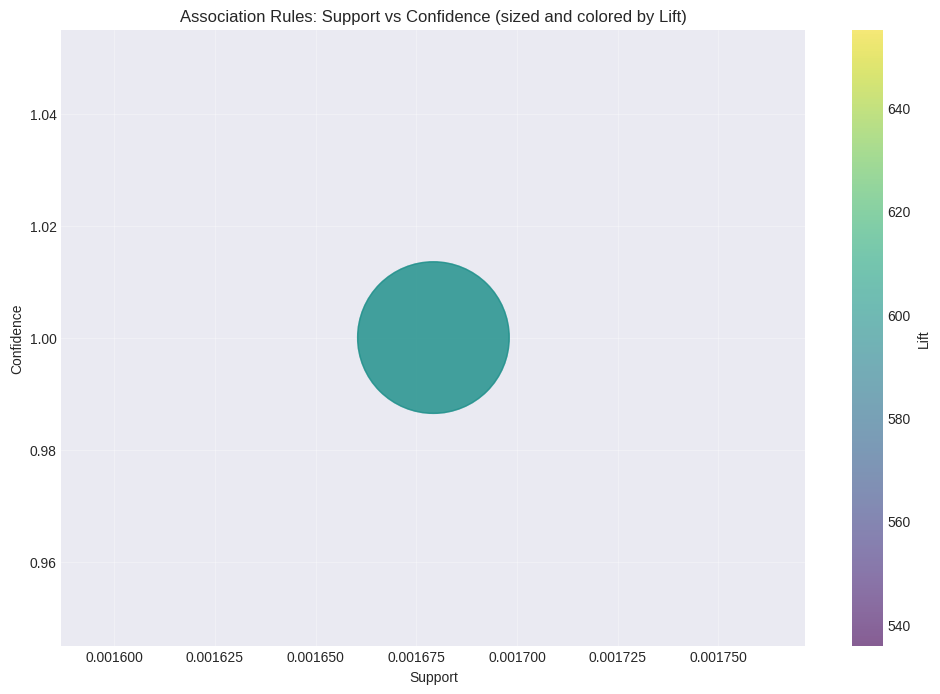


High-quality rules (Lift > 2, Confidence > 50%): 2


In [43]:
# Create scatter plot of rules
plt.figure(figsize=(12, 8))
scatter = plt.scatter(rules['support'], rules['confidence'],
                     c=rules['lift'], s=rules['lift']*20,
                     alpha=0.6, cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (sized and colored by Lift)')
plt.colorbar(scatter, label='Lift')
plt.grid(True, alpha=0.3)
plt.show()

# Filter high-quality rules
high_quality_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print(f"\nHigh-quality rules (Lift > 2, Confidence > 50%): {len(high_quality_rules)}")

8. Business Insights and Recommendations

In [44]:
# Cluster personas
cluster_personas = {
    0: {"name": "High-Value Loyalists", "strategy": "Offer VIP discounts"},
    1: {"name": "At-Risk Customers", "strategy": "Win-back campaigns"},
    2: {"name": "Budget Shoppers", "strategy": "Bundle deals"}
}

In [45]:
# Generate recommendations
print("\nBusiness Recommendations:")
for Cluster, persona in cluster_personas.items():
    print(f"\nCluster {Cluster} - {persona['name']}:")
    print(f"Recommended Strategy: {persona['strategy']}")

    # Get top products for this cluster
    cluster_users = rfm_clean[rfm_clean['Cluster'] == Cluster]['user_id']
    cluster_products = df[df['user_id'].isin(cluster_users)]['product_name'].value_counts().head(3)

    print("Top Products:")
    for product, count in cluster_products.items():
        print(f"  - {product} (Purchased {count} times)")

# Product recommendations from association rules
print("\nTop Product Bundling Opportunities:")
top_rules = rules.sort_values('lift', ascending=False).head(3)
for idx, rule in top_rules.iterrows():
    antecedents = ", ".join(list(rule['antecedents']))
    consequents = ", ".join(list(rule['consequents']))
    print(f"\nIf customers buy: {antecedents}")
    print(f"Then recommend: {consequents}")
    print(f"Confidence: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f}")


Business Recommendations:

Cluster 0 - High-Value Loyalists:
Recommended Strategy: Offer VIP discounts
Top Products:
  - Firestick Remote (Purchased 2 times)
  - boAt Type C A325 Tangle-free, Sturdy Type C Cable with 3A Rapid Charging & 480mbps Data Transmission(Black) (Purchased 2 times)
  - Offbeat® - DASH 2.4GHz Wireless + Bluetooth 5.1 Mouse, Multi-Device Dual Mode Slim Rechargeable Silent Click Buttons Wireless Bluetooth Mouse, 3 Adjustable DPI, Works on 2 devices at the same time with a switch button for Windows/Mac/Android/Ipad/Smart TV (Purchased 1 times)

Cluster 1 - At-Risk Customers:
Recommended Strategy: Win-back campaigns
Top Products:
  - Noise ColorFit Pro 4 Advanced Bluetooth Calling Smart Watch with 1.72" TruView Display, Fully-Functional Digital Crown, 311 PPI, 60Hz Refresh Rate, 500 NITS Brightness (Charcoal Black) (Purchased 2 times)
  - Cubetek 3 in 1 LCD Display V5.0 Bluetooth Transmitter Receiver, Bypass Audio Adapter with Aux, Optical, Dual Link Support for TV,

9. Save Results

In [46]:
rfm_clean.to_csv('amazon_customer_segments.csv', index=False)
rules.to_csv('amazon_association_rules.csv', index=False)
print("\nResults saved to CSV files.")


Results saved to CSV files.
